In [1]:
import tensorflow.compat.v1 as tf
#Lets see if tensorflow finds the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#import tensorflow as tf

2023-05-08 13:09:38.380591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 13:09:38.883901: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1


2023-05-08 13:09:42.076679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-08 13:09:42.194409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-08 13:09:42.194953: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
#Lets see if it works
tf.ones(1) + tf.ones(1)

2023-05-08 13:09:42.207428: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 13:09:42.207925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-08 13:09:42.208042: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-08 13:09:42.208116: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative val

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [3]:
import numpy as np # for working with arrays and matrices
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

import os # OS module provides various operating system-related functions to the code
import csv # CSV module is used for working with CSV (Comma Separated Values) files in Python.
import pickle

# used for splitting data into training and testing sets in Python.
from sklearn.model_selection import train_test_split 

# for generating a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from keras.models import load_model


# Classes and functions from the Keras library which is used for building and training deep learning models in Python.
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from save_model_info import save_training_info


# These import the Adam optimizer class and various other classes from the TensorFlow Keras library 
# which is a high-level neural networks API used for building and training deep learning models in Python.
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


from plots import plot_confusion_matrix, plot_accuracy, plot_loss, plot_accuracy_k_fold, plot_loss_k_fold, plot_average_accuracy_k_fold, plot_average_loss_k_fold

In [4]:
%store -r experiment_ID
print(experiment_ID)
%store -r save_dir
print(save_dir)
%store -r model_version
print(model_version)
%store -r train_loss_all
%store -r val_loss_all
%store -r train_acc_all
%store -r val_acc_all
%store -r num_folds
%store -r conf_matrices
%store -r epochs

# %store -r epochs

3.2
/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/output/pickles
BPNN_V3_1


In [21]:
epochs

1

In [ ]:
# dir_path = save_dir
# history_file = os.path.join(dir_path, 'history.pkl')
# train_images_file = os.path.join(dir_path, 'train_images.pkl')
# train_labels_file = os.path.join(dir_path, 'train_labels.pkl')
# val_images_file = os.path.join(dir_path, 'val_images.pkl')
# val_labels_file = os.path.join(dir_path, 'val_labels.pkl')

In [ ]:
# # Load the history object from the pickle file
# with open(os.path.join(dir_path,'history.pkl'), 'rb') as f:
#     history = pickle.load(f)
    
# with open(os.path.join(dir_path,'train_images.pkl'), 'rb') as f:
#     train_images = pickle.load(f)
    
# with open(os.path.join(dir_path,'train_labels.pkl'), 'rb') as f:
#     train_labels = pickle.load(f)
    
# with open(os.path.join(dir_path,'val_images.pkl'), 'rb') as f:
#     val_images = pickle.load(f)
    
# with open(os.path.join(dir_path,'val_labels.pkl'), 'rb') as f:
#     val_labels = pickle.load(f)

In [5]:
model_acc_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/output/accuracy"
model_loss_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/output/loss"
model_cm_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/output/cm"
model_path = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/output/pickles"
model_average_acc_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/output/accuracy"
model_average_loss_dir = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V3/output/loss"

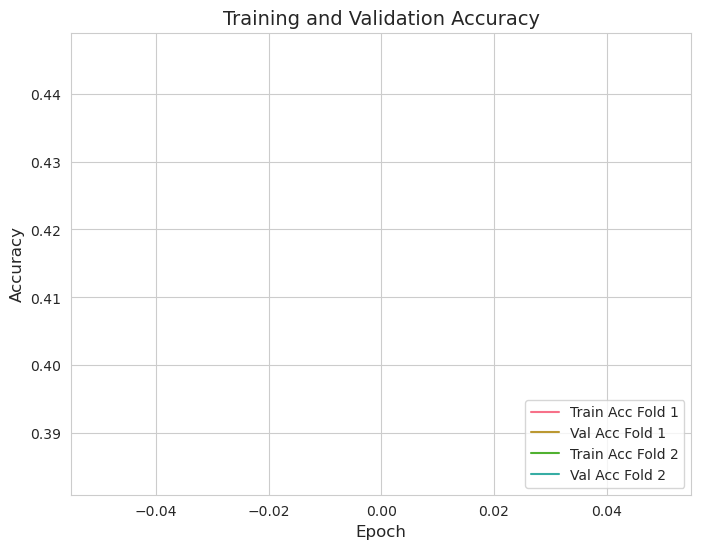

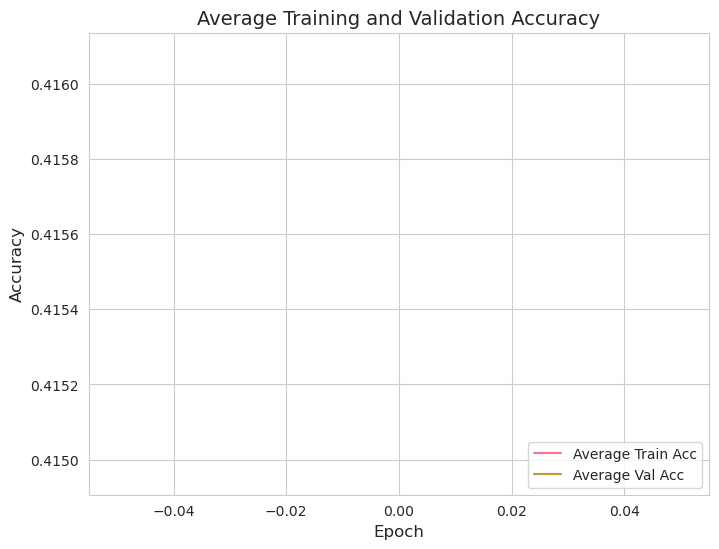

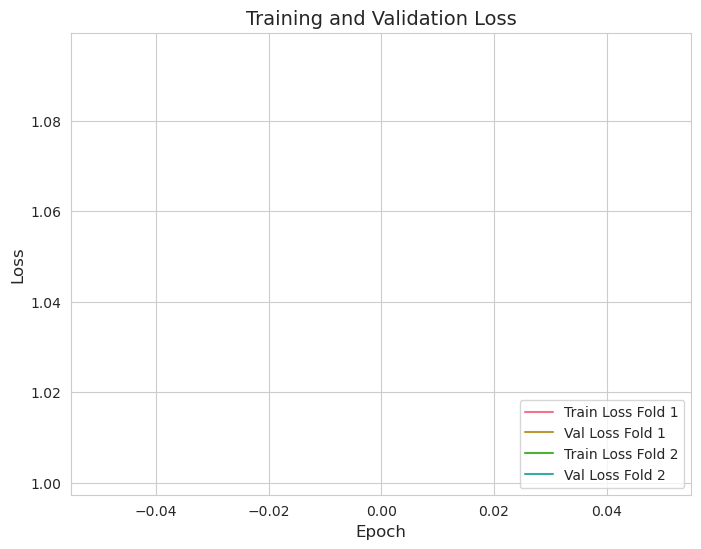

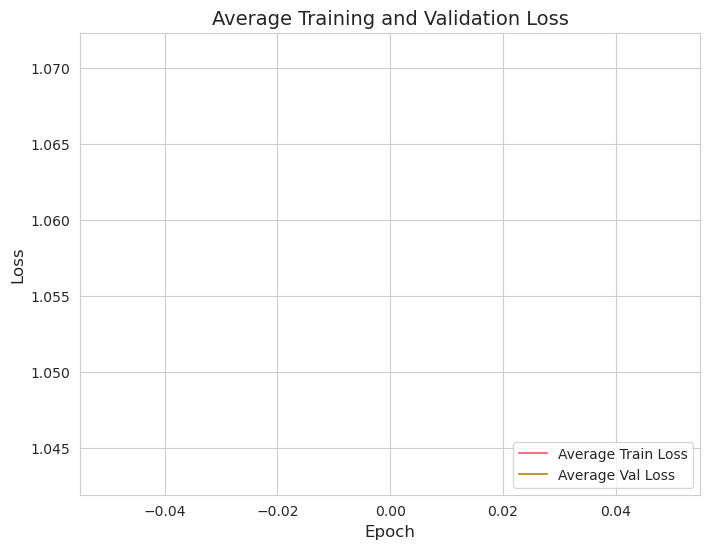

In [6]:
plot_accuracy_k_fold(experiment_ID, model_acc_dir, train_acc_all, val_acc_all, num_folds=num_folds, num_epochs=epochs)
mean_train_acc, mean_val_acc = plot_average_accuracy_k_fold(experiment_ID, model_average_acc_dir, train_acc_all, val_acc_all, num_folds=num_folds, num_epochs=epochs)
plot_loss_k_fold(experiment_ID, model_loss_dir, train_loss_all, val_loss_all, num_folds=num_folds, num_epochs=epochs)
mean_train_loss, mean_val_loss = plot_average_loss_k_fold(experiment_ID, model_average_loss_dir, train_loss_all, val_loss_all, num_folds=num_folds, num_epochs=epochs)
# no_of_behaviors = ['Main Corr', 'Left Corr', 'Right Corr']
# f1_score_val = plot_confusion_matrix(experiment_ID, no_of_behaviors, train_labels, val_labels, train_images, val_images, model_cm_dir, model_path, model_version)
# plot_loss(experiment_ID, history, model_loss_dir)
# plot_loss_k_fold(experiment_ID, model_acc_dir, train_loss_all, val_loss_all, num_folds=5, num_epochs=40)
# plot_accuracy(experiment_ID, history, model_acc_dir)
# no_of_behaviors = ['Main Corr', 'Left Corr', 'Right Corr']
# f1_score_val = plot_confusion_matrix(experiment_ID, no_of_behaviors, train_labels, val_labels, train_images, val_images, model_cm_dir, model_path, model_version)

In [22]:
mean_train_loss

array([1.04329693])

In [ ]:
# %store -r model
# %store -r history
# %store -r video_name
%store -r comment
%store -r experiment_ID

In [ ]:
# save_training_info()

In [ ]:
# save_training_info(model=model, history=history, video_name=video_name, comment=comment, experiment_ID=experiment_ID, save_dir=save_dir, f1_score=f1_score_val)

In [ ]:
save_training_info(video_name=video_name, comment=comment, experiment_ID=experiment_ID, save_dir=save_dir)